# Data Analysis using Pandas 

In [31]:
import pandas as pd
import numpy as np

In [2]:
ins_data = pd.read_csv("C:\Data Analytics\Python\Pandas\insurance.csv")

In [3]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Describe func

In [4]:
ins_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Data Visualisation With Pandas

<Axes: ylabel='count'>

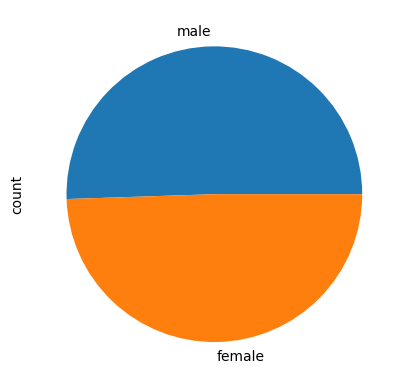

In [8]:
ins_data['sex'].value_counts().plot(kind='pie')

In [9]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
ins_data['family_count'] = ins_data['children']+1

In [11]:
ins_data['avg_exp_per_head'] = ins_data['expenses']/ins_data['family_count']

In [12]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses,family_count,avg_exp_per_head
0,19,female,27.9,0,yes,southwest,16884.92,1,16884.920
1,18,male,33.8,1,no,southeast,1725.55,2,862.775
2,28,male,33.0,3,no,southeast,4449.46,4,1112.365
3,33,male,22.7,0,no,northwest,21984.47,1,21984.470
4,32,male,28.9,0,no,northwest,3866.86,1,3866.860


<Axes: xlabel='bmi', ylabel='avg_exp_per_head'>

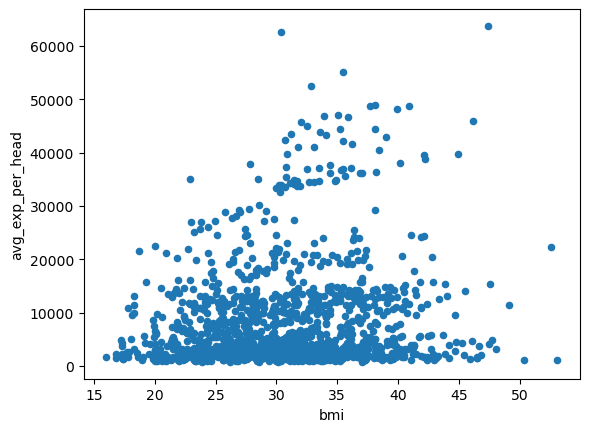

In [17]:
ins_data[['bmi','avg_exp_per_head']].plot(x='bmi', y='avg_exp_per_head',kind='scatter')

<Axes: ylabel='Frequency'>

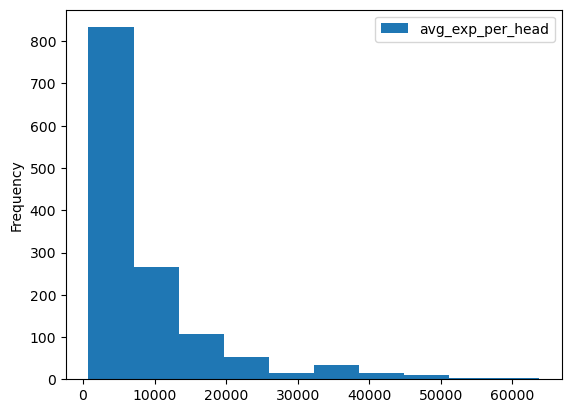

In [20]:
ins_data[['age','avg_exp_per_head']].plot(x='age', y='avg_exp_per_head',kind='hist')

In [19]:
ins_data.describe()

,age,bmi,children,expenses,family_count,avg_exp_per_head
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,2.094918,8269.590948
std,14.049960,6.098382,1.205493,12110.011240,1.205493,9398.904288
min,18.000000,16.000000,0.000000,1121.870000,1.000000,768.000000
25%,27.000000,26.300000,0.000000,4740.287500,1.000000,2206.168000
50%,39.000000,30.400000,1.000000,9382.030000,2.000000,4317.090000
75%,51.000000,34.700000,2.000000,16639.915000,3.000000,11454.965000
max,64.000000,53.100000,5.000000,63770.430000,6.000000,63770.430000


In [21]:
grp_df = ins_data.groupby('region')

<Axes: xlabel='region'>

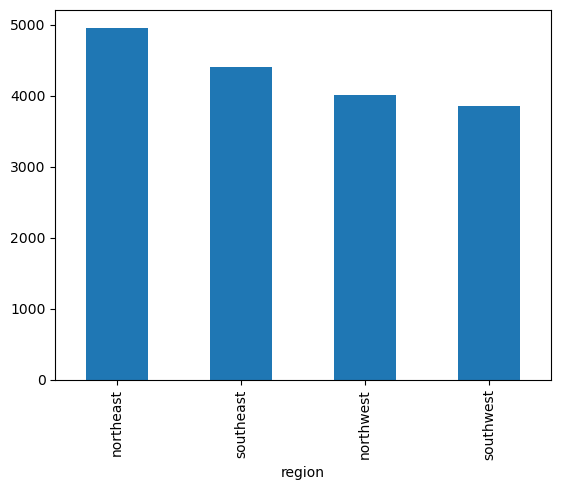

In [28]:
grp_df['avg_exp_per_head'].median().sort_values(ascending=False).plot(kind='bar')

In [24]:
age_grp = ins_data.groupby('age')

<Axes: ylabel='age'>

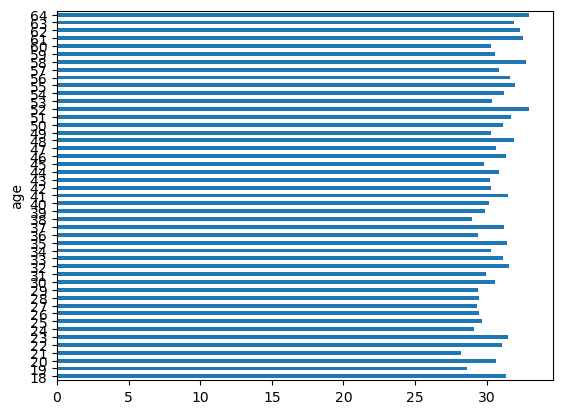

In [26]:
age_grp['bmi'].mean().plot(kind='barh')

In [29]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   expenses          1338 non-null   float64
 7   family_count      1338 non-null   int64  
 8   avg_exp_per_head  1338 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 94.2+ KB


# Time series Analysis 

In [49]:
data = {
    'date': pd.date_range(start='2023-01-01', periods=534, freq='D').strftime('%Y-%m-%d').tolist(),
    'count': np.random.randint(1, 80, size=534).tolist()
}

In [50]:
date_df =  pd.DataFrame(data)

In [51]:
date_df.head()

,date,count
0,2023-01-01,27
1,2023-01-02,7
2,2023-01-03,10
3,2023-01-04,19
4,2023-01-05,31


In [52]:
date_df.shape

(534, 2)

# Convert Date Column To Date Type

In [53]:
date_df.dtypes

date     object
count     int64
dtype: object

In [56]:
date_df['date'] = pd.to_datetime(date_df['date'],format='%Y-%m-%d')

In [57]:
date_df.dtypes

date     datetime64[ns]
count             int64
dtype: object

In [58]:
date_df.sort_values('date')

,date,count
0,2023-01-01,27
1,2023-01-02,7
2,2023-01-03,10
3,2023-01-04,19
4,2023-01-05,31
...,...,...
529,2024-06-13,41
530,2024-06-14,32
531,2024-06-15,69
532,2024-06-16,27


<Axes: xlabel='date'>

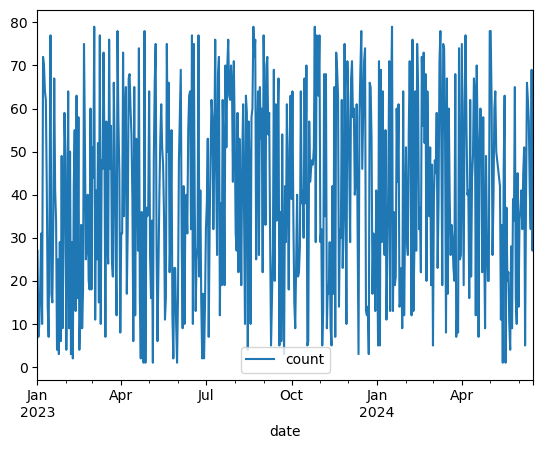

In [63]:
date_df.plot(x='date',y='count',kind='line')

In [65]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses,family_count,avg_exp_per_head
0,19,female,27.9,0,yes,southwest,16884.92,1,16884.920
1,18,male,33.8,1,no,southeast,1725.55,2,862.775
2,28,male,33.0,3,no,southeast,4449.46,4,1112.365
3,33,male,22.7,0,no,northwest,21984.47,1,21984.470
4,32,male,28.9,0,no,northwest,3866.86,1,3866.860


In [66]:
ins_data.sex.unique()

array(['female', 'male'], dtype=object)

In [67]:
ins_data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
ins_data.smoker.unique()

array(['yes', 'no'], dtype=object)

# Label Encoding

In [70]:
ins_data.sex.map({'male':0, 'female':1}).head()

0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

# One Hot Incoding

In [73]:
pd.get_dummies(ins_data, columns=['sex'])

,age,bmi,children,smoker,region,expenses,family_count,avg_exp_per_head,sex_female,sex_male
0,19,27.9,0,yes,southwest,16884.92,1,16884.9200,True,False
1,18,33.8,1,no,southeast,1725.55,2,862.7750,False,True
2,28,33.0,3,no,southeast,4449.46,4,1112.3650,False,True
3,33,22.7,0,no,northwest,21984.47,1,21984.4700,False,True
4,32,28.9,0,no,northwest,3866.86,1,3866.8600,False,True
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,no,northwest,10600.55,4,2650.1375,False,True
1334,18,31.9,0,no,northeast,2205.98,1,2205.9800,True,False
1335,18,36.9,0,no,southeast,1629.83,1,1629.8300,True,False
1336,21,25.8,0,no,southwest,2007.95,1,2007.9500,True,False
